In [8]:
from sklearn.model_selection import train_test_split 
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [3]:
iris = datasets.load_iris() 
print(iris.data.shape,iris.target.shape) 
print ("Iris data set Description : ", iris['DESCR']) 

(150, 4) (150,)
Iris data set Description :  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    =====

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0) 
print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape) 


(105, 4) (105,)
(45, 4) (45,)


In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
print(y_kmeans)
print(y_kmeans.data.shape)
print(kmeans.cluster_centers_)
print(confusion_matrix(y_train,y_kmeans))

[2 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 0 1 1 0 2 1 1 0 1 2 2 1 2 0 2
 1 0 0 0 0 1 1 0 0 1 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 2 1 1 2 1 0 2 0 2 1
 2 1 0 1 1 0 1 0 2 2 2 0 0 2 0 1 2 0 2 1 2 2 2 2 1 1 1 0 2 0 1]
(105,)
[[6.909375   3.1        5.728125   2.0625    ]
 [4.99411765 3.38235294 1.45294118 0.23235294]
 [5.84358974 2.70512821 4.34102564 1.41025641]]
[[ 0 34  0]
 [ 3  0 29]
 [29  0 10]]


In [6]:
y=kmeans.fit(X_train)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
z=kmeans.fit_predict(X_test)
print(z)
print(z.data.shape)
print(kmeans.cluster_centers_)
kmeans.labels_
print (kmeans.labels_)


[2 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 0 1 1 0 2 1 1 0 1 2 2 1 2 0 2
 1 0 0 0 0 1 1 0 0 1 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 2 1 1 2 1 0 2 0 2 1
 2 1 0 1 1 0 1 0 2 2 2 0 0 2 0 1 2 0 2 1 2 2 2 2 1 1 1 0 2 0 1]
[[6.909375   3.1        5.728125   2.0625    ]
 [4.99411765 3.38235294 1.45294118 0.23235294]
 [5.84358974 2.70512821 4.34102564 1.41025641]]
[0 2 1 0 1 0 1 0 0 2 0 2 2 2 2 1 2 2 1 1 0 2 1 1 0 1 1 2 2 1 0 2 1 0 0 2 1
 0 2 2 0 1 0 1 1]
(45,)
[[6.38571429 2.91428571 5.27857143 1.9       ]
 [5.03125    3.525      1.48125    0.275     ]
 [5.85333333 2.78       4.27333333 1.33333333]]
[0 2 1 0 1 0 1 0 0 2 0 2 2 2 2 1 2 2 1 1 0 2 1 1 0 1 1 2 2 1 0 2 1 0 0 2 1
 0 2 2 0 1 0 1 1]


In [11]:
cm=confusion_matrix(z,y_test)
print(cm)

[[ 0  3 11]
 [16  0  0]
 [ 0 15  0]]


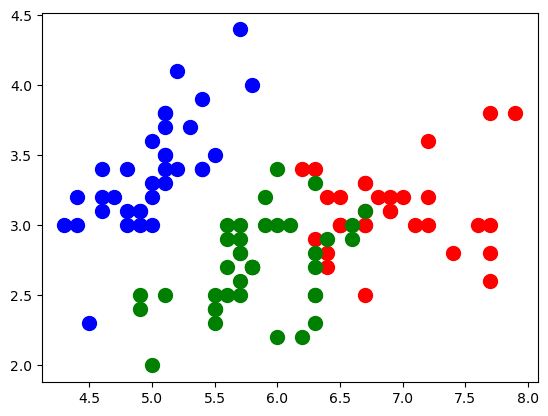

In [14]:
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

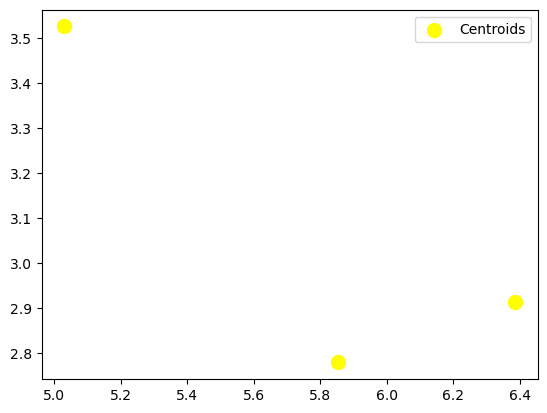

In [16]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()